I chose a dataset with data from dog owners in the Swiss city of Zurich for analysis. Let's imagine that we are analysts of a network of veterinary clinics and we need to open several clinics in Zurich. To do this, we need to analyze the data and answer the following questions:

1.Who will be our potential client? 

Answer: Age 30-40 years old Owners.

2.In which area is it better to place the clinic?

Answer: Between District 10 and 11, District 6 and 7

3.How to advertise our services? 

Answer: Female 30-70 of age with Dogs 10 years bellow 

We import the necessary libraries for loading the CSV file into the dataframe and for plotting.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import date
from operator import itemgetter
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

Let's download the data on registered dogs for 2017. To compile a portrait of the owner, we will delete all NAN values. Let's display the first 5 lines of the dataframe.

In [2]:
dog17_filepath = '/Users/aquinojoeanson/Desktop/SPRINGBOARD/CaseStudies/28_3_CS_Storyteling_ZurichDogs/20170307hundehalter.csv'

dog17data = pd.read_csv(dog17_filepath)
dog17data['ALTER'].dropna()
df = pd.read_csv(dog17_filepath)
df.dropna(subset = ["ALTER"], inplace=True)
df.drop(['RASSE1_MISCHLING','RASSE2','RASSE2_MISCHLING','STADTQUARTIER'], axis='columns', inplace=True)

df = df.rename(columns={'ALTER': 'Age','GESCHLECHT':'Gender',
                        'STADTKREIS': 'District','RASSE1': 'Primary Breed',
                        'RASSE2':'Secondary Breed','GEBURTSJAHR_HUND': 'Year of Birth',
                        'GESCHLECHT_HUND': 'Dog Gender','HUNDEFARBE':'Color',
                        'RASSENTYP':'Breed Type', 'HALTER_ID':'Holder_id'
                       })
df.head()

,Holder_id,Age,Gender,District,Primary Breed,Breed Type,Year of Birth,Dog Gender,Color
0,126,61-70,m,9.0,Welsh Terrier,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,Berner Sennenhund,I,2009,m,tricolor
2,574,61-70,w,2.0,Mischling gross,I,2013,w,schwarz
3,695,41-50,m,6.0,Labrador Retriever,I,2012,w,braun
4,893,61-70,w,7.0,Mittelschnauzer,I,2010,w,schwarz


Consider the data types in the dataset

In [3]:
df.dtypes

Holder_id          int64
Age               object
Gender            object
District         float64
Primary Breed     object
Breed Type        object
Year of Birth      int64
Dog Gender        object
Color             object
dtype: object

Mostly categorical.

# Age of owners and their dogs

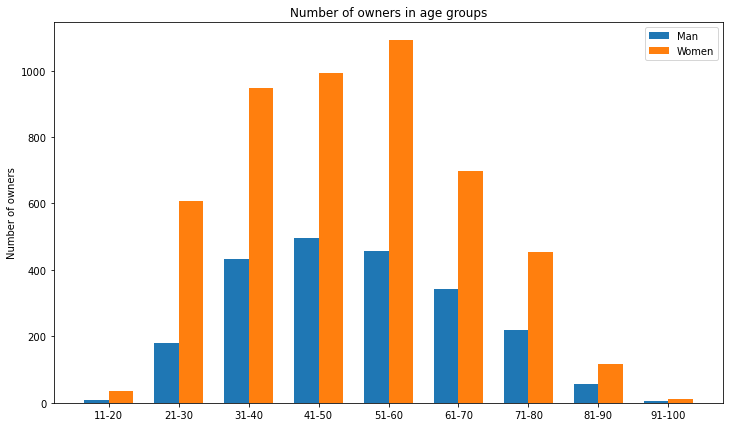

In [4]:
label = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','91-100']
x = np.arange(len(label))
width = 0.35
# df.Age.unique()
men, women = [], []
for age in label:
    men.append(len(df[(df.Gender == 'm') & (df.Age == age)]))
    women.append(len(df[(df.Gender == 'w') & (df.Age == age)]))
fig,ax = plt.subplots(figsize=(12,7))
rec = ax.bar(x-width/2, men, width, label='Man')
rect = ax.bar(x+width/2, women, width, label='Women')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_ylabel('Number of owners')
ax.set_title('Number of owners in age groups')
ax.legend()

## The ratio of the sex of the owner to the sex of the dog

Text(0.5, 0, 'Gender of the dog')

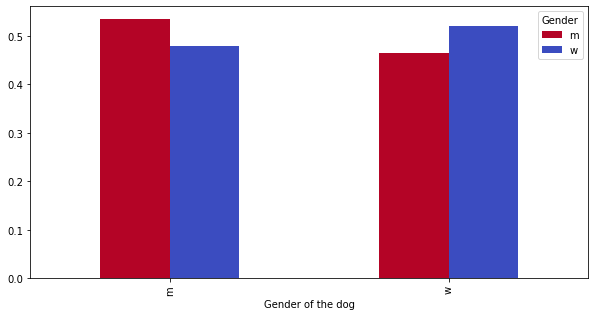

In [5]:
men_hht1=df[df.Gender=='m'];
women_hht1=df[df.Gender=='w'];
gender_dog_gender=df.groupby(['Dog Gender','Gender'])['Holder_id'].count().unstack()
gender_dog_gender=gender_dog_gender.fillna(0)
gender_dog_gender.m=gender_dog_gender.m/len(men_hht1)
gender_dog_gender.w=gender_dog_gender.w/len(women_hht1)
fig, ax = plt.subplots(figsize=(10, 5))
gender_dog_gender.plot(kind='bar',ax=ax,colormap=plt.cm.coolwarm_r, grid=False)
ax.set_xlabel('Gender of the dog')

The gender of the dog often matches the gender of the owner.

## Dog breeds by owner sex

<AxesSubplot:xlabel='Primary Breed'>

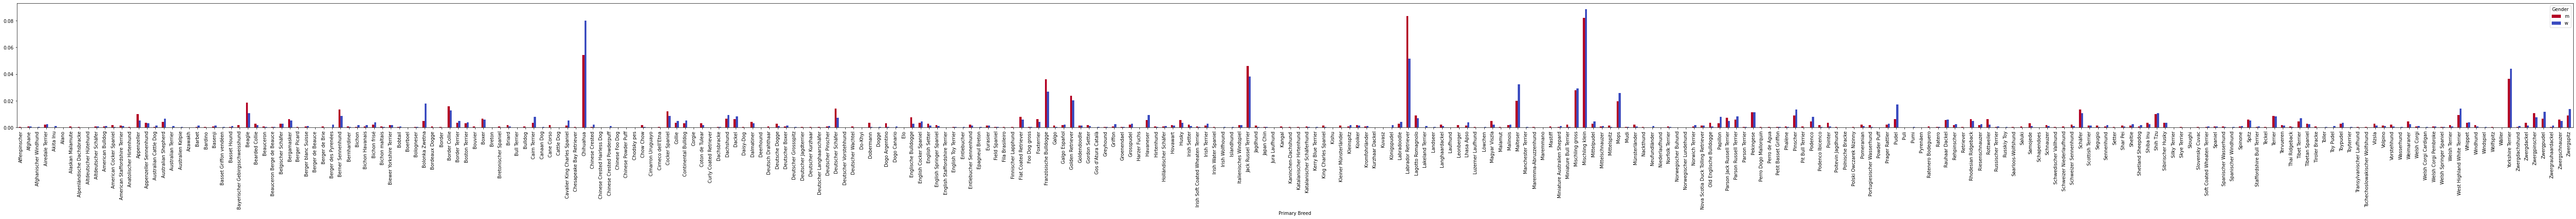

In [6]:
genders_dogbreed=df.groupby(['Primary Breed','Gender'])['Holder_id'].count().unstack()
genders_dogbreed=genders_dogbreed.fillna(0)
genders_dogbreed.m=genders_dogbreed.m/len(men_hht1)
genders_dogbreed.w=genders_dogbreed.w/len(women_hht1)

fig, ax = plt.subplots(figsize=(100, 5))
genders_dogbreed.plot(kind='bar',ax=ax,colormap=plt.cm.coolwarm_r, grid=False)

## Age distribution of dogs

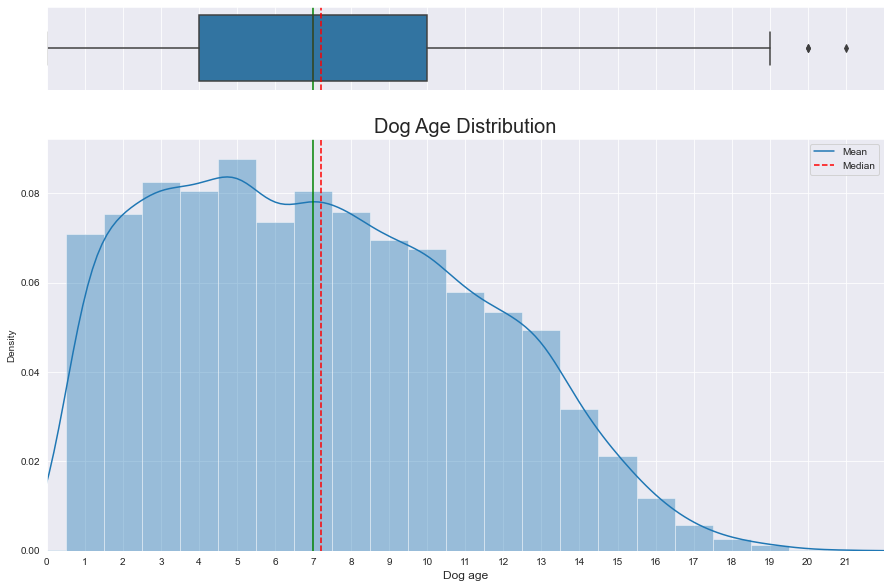

7.1951355884819685


In [16]:
df = pd.read_csv(dog17_filepath,index_col='HALTER_ID')
df.dropna(subset = ["ALTER"], inplace=True)

df['dog_age'] = 2017 - df['GEBURTSJAHR_HUND']

b = df['dog_age'][(df['dog_age'] >= 0) & (df['dog_age'] <= 25)]
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(15,10))
mean=b.mean()
median=b.median()
sns.set_style("darkgrid")
sns.boxplot(b, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')


sns.distplot(a=b,hist=True, bins=np.arange(min(b)-0.5, max(b)+1, 1), ax = ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')


plt.xticks(np.arange(min(b), max(b)+1, 1))
plt.xlabel('Dog age', fontsize=12)
plt.title("Dog Age Distribution", fontsize=20)
plt.xlim(min(b), max(b) + 1)

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()
print(mean)

## Average age of dogs in age groups of owners

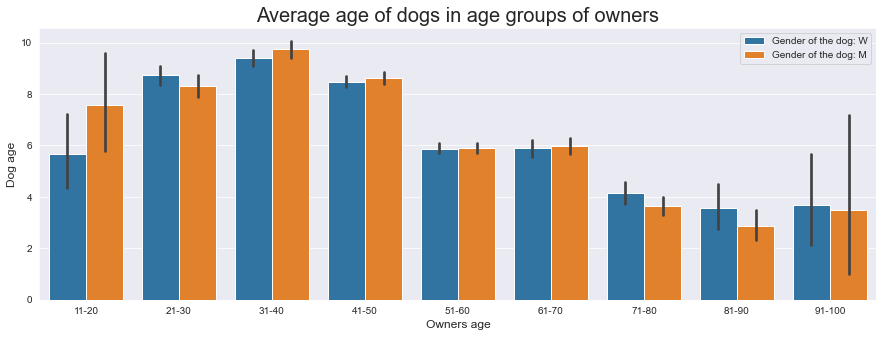

In [19]:
df['dog_age'] = 2017 - df['GEBURTSJAHR_HUND']
owner = df['ALTER']
s_owner = sorted(owner)
age = df['dog_age'][(df['dog_age'] >= 0) & (df['dog_age'] <= 25)]
sex = df['GESCHLECHT_HUND']

plt.figure(figsize=(15,5))
ax = sns.barplot(x=s_owner, y=age,hue=sex)

l = plt.legend()
l.get_texts()[0].set_text('Gender of the dog: W')
l.get_texts()[1].set_text('Gender of the dog: M')

plt.xlabel('Owners age', fontsize=12)
plt.ylabel('Dog age', fontsize=12)
plt.title('Average age of dogs in age groups of owners', fontsize=20)

plt.show()

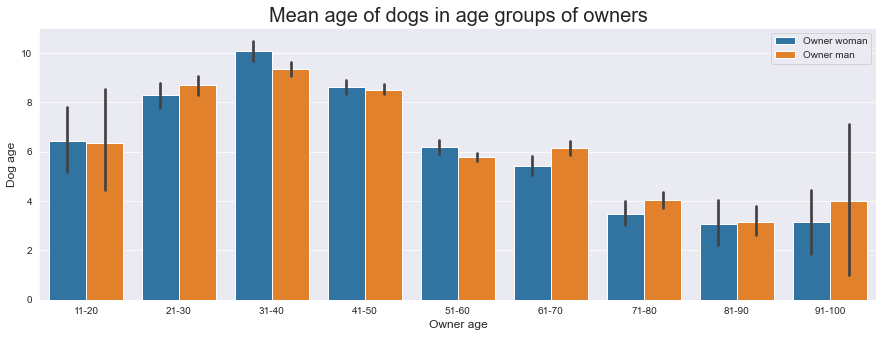

In [18]:
df['dog_age'] = 2017 - df['GEBURTSJAHR_HUND']
owner = df['ALTER']
owner_sex = df['GESCHLECHT']
s_owner = sorted(owner)
age = df['dog_age'][(df['dog_age'] >= 0) & (df['dog_age'] <= 25)]
sex = df['GESCHLECHT_HUND']

plt.figure(figsize=(15,5))
ax = sns.barplot(x=s_owner, y=age,hue=owner_sex)

l = plt.legend()
l.get_texts()[0].set_text('Owner woman')
l.get_texts()[1].set_text('Owner man')

plt.xlabel('Owner age', fontsize=12)
plt.ylabel('Dog age', fontsize=12)
plt.title('Mean age of dogs in age groups of owners', fontsize=20)

plt.show()

## Distribution by districts

Text(0.5, 0, 'Area')

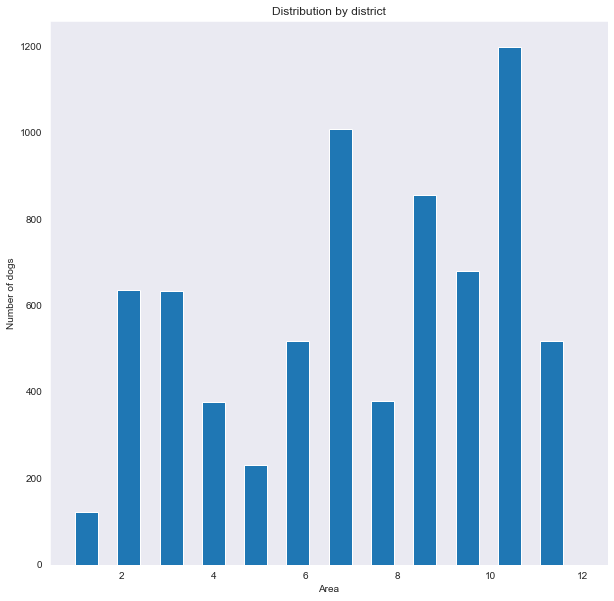

In [10]:
s = df.iloc[:, 2]
s.value_counts()
ax = s.hist(bins=12, grid=False, width=0.5,figsize=(10,10))
ax.set_title('Distribution by district')
ax.set_ylabel('Number of dogs')
ax.set_xlabel('Area')

# Rating of dog breeds by district

In [11]:
df['STADTKREIS'] = df['STADTKREIS'].fillna(0.0).astype(int)
district_1 = df[df.STADTKREIS == 1]
district_2 = df[df.STADTKREIS == 2]
district_3 = df[df.STADTKREIS == 3]
district_4 = df[df.STADTKREIS == 4]
district_5 = df[df.STADTKREIS == 5]
district_6 = df[df.STADTKREIS == 6]
district_7 = df[df.STADTKREIS == 7]
district_8 = df[df.STADTKREIS == 8]
district_9 = df[df.STADTKREIS == 9]
district_10 = df[df.STADTKREIS == 10]
district_11 = df[df.STADTKREIS == 11]
district_12 = df[df.STADTKREIS == 12]

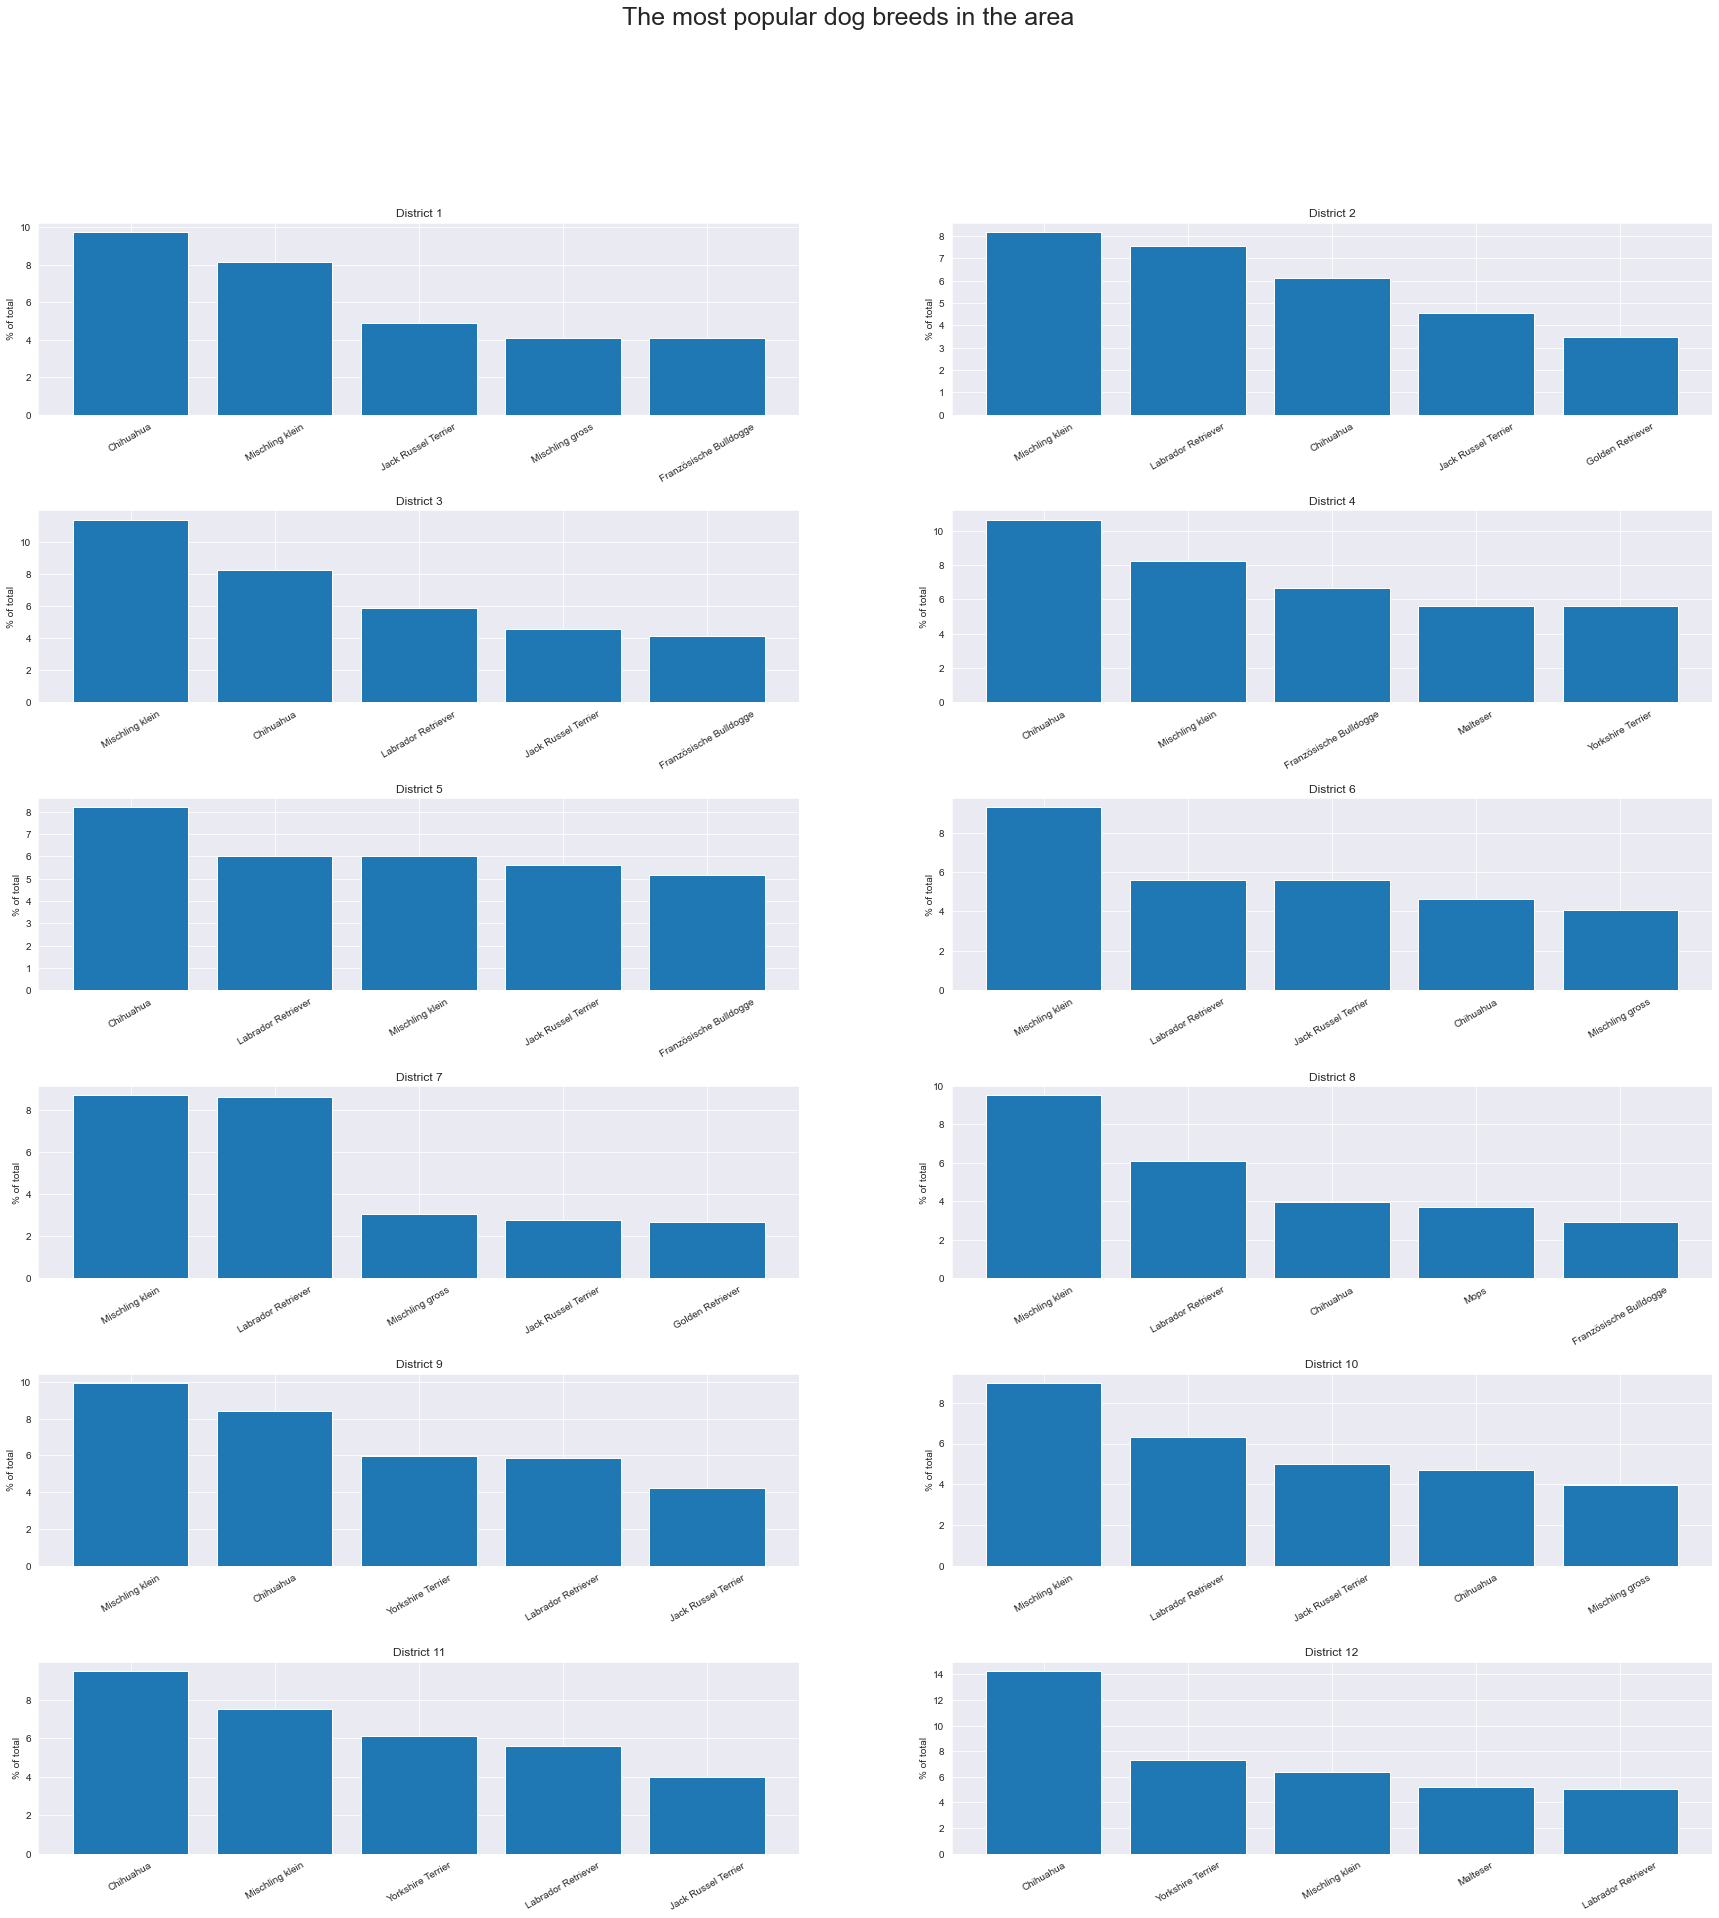

In [20]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(nrows=6, ncols=2, figsize=(30,30))
plt.subplots_adjust(hspace=0.5)

# district 1 
d1_races = district_1['RASSE1'].value_counts()
d1_races = d1_races/sum(d1_races)
d1_races_percent = (d1_races*100).head(5)
ax1.bar(d1_races_percent.index , d1_races_percent)
ax1.set_title('District 1')
ax1.set_ylabel('% of total')
ax1.set_xticklabels(d1_races_percent.index, rotation=30)

# district 2 
d2_races = district_2['RASSE1'].value_counts()
d2_races = d2_races/sum(d2_races)
d2_races_percent = (d2_races*100).head(5)
ax2.bar(d2_races_percent.index , d2_races_percent)
ax2.set_title('District 2')
ax2.set_ylabel('% of total')
ax2.set_xticklabels(d2_races_percent.index, rotation=30)

# district 3 
d3_races = district_3['RASSE1'].value_counts()
d3_races = d3_races/sum(d3_races)
d3_races_percent = (d3_races*100).head(5)
ax3.bar(d3_races_percent.index , d3_races_percent)
ax3.set_title('District 3')
ax3.set_ylabel('% of total')
ax3.set_xticklabels(d3_races_percent.index, rotation=30)

# district 4 
d4_races = district_4['RASSE1'].value_counts()
d4_races = d4_races/sum(d4_races)
d4_races_percent = (d4_races*100).head(5)
ax4.bar(d4_races_percent.index , d4_races_percent)
ax4.set_title('District 4')
ax4.set_ylabel('% of total')
ax4.set_xticklabels(d4_races_percent.index, rotation=30)

# district 5 plot
d5_races = district_5['RASSE1'].value_counts()
d5_races = d5_races/sum(d5_races)
d5_races_percent = (d5_races*100).head(5)
ax5.bar(d5_races_percent.index , d5_races_percent)
ax5.set_title('District 5')
ax5.set_ylabel('% of total')
ax5.set_xticklabels(d5_races_percent.index, rotation=30)

# district 6 
d6_races = district_6['RASSE1'].value_counts()
d6_races = d6_races/sum(d6_races)
d6_races_percent = (d6_races*100).head(5)
ax6.bar(d6_races_percent.index , d6_races_percent)
ax6.set_title('District 6')
ax6.set_ylabel('% of total')
ax6.set_xticklabels(d6_races_percent.index, rotation=30)

# district 7 
d7_races = district_7['RASSE1'].value_counts()
d7_races = d7_races/sum(d7_races)
d7_races_percent = (d7_races*100).head(5)
ax7.bar(d7_races_percent.index , d7_races_percent)
ax7.set_title('District 7')
ax7.set_ylabel('% of total')
ax7.set_xticklabels(d7_races_percent.index, rotation=30)

# district 8 
d8_races = district_8['RASSE1'].value_counts()
d8_races = d8_races/sum(d8_races)
d8_races_percent = (d8_races*100).head(5)
ax8.bar(d8_races_percent.index , d8_races_percent)
ax8.set_title('District 8')
ax8.set_ylabel('% of total')
ax8.set_xticklabels(d8_races_percent.index, rotation=30)

# district 9 plot
d9_races = district_9['RASSE1'].value_counts()
d9_races = d9_races/sum(d9_races)
d9_races_percent = (d9_races*100).head(5)
ax9.bar(d9_races_percent.index , d9_races_percent)
ax9.set_title('District 9')
ax9.set_ylabel('% of total')
ax9.set_xticklabels(d9_races_percent.index, rotation=30)

# district 10 
d10_races = district_10['RASSE1'].value_counts()
d10_races = d10_races/sum(d10_races)
d10_races_percent = (d10_races*100).head(5)
ax10.bar(d10_races_percent.index , d10_races_percent)
ax10.set_title('District 10')
ax10.set_ylabel('% of total')
ax10.set_xticklabels(d10_races_percent.index, rotation=30)

# district 11 
d11_races = district_11['RASSE1'].value_counts()
d11_races = d11_races/sum(d11_races)
d11_races_percent = (d11_races*100).head(5)
ax11.bar(d11_races_percent.index , d11_races_percent)
ax11.set_title('District 11')
ax11.set_ylabel('% of total')
ax11.set_xticklabels(d11_races_percent.index, rotation=30)

# district 12 
d12_races = district_12['RASSE1'].value_counts()
d12_races = d12_races/sum(d12_races)
d12_races_percent = (d12_races*100).head(5)
ax12.bar(d12_races_percent.index , d12_races_percent)
ax12.set_title('District 12')
ax12.set_ylabel('% of total')
ax12.set_xticklabels(d12_races_percent.index, rotation=30)

fig.suptitle('The most popular dog breeds in the area', fontsize=25)

plt.show()

## Use a T-test to test the hypothesis that: "The distribution of dogs by area varies from year to year"

Consider 2 samples using the example of comparing 2016 and 2017

Standard deviations for the two datasets: 
	- 2016: 306.317
	- 2017: 312.537
T-test results: 
	- t = -0.149 
	- p = 0.883


Text(0.5, 0, 'District')

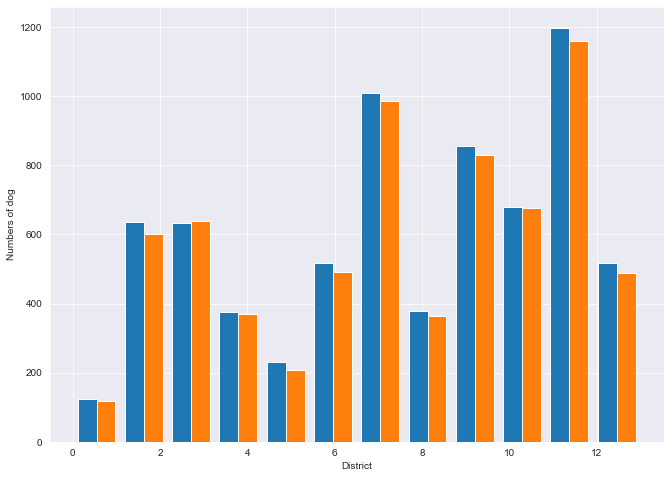

In [21]:
from scipy.stats import ttest_ind
# import the two datasets
df2016 = pd.read_csv('/Users/aquinojoeanson/Desktop/SPRINGBOARD/CaseStudies/28_3_CS_Storyteling_ZurichDogs/20160307hundehalter.csv')
df2017 = pd.read_csv('/Users/aquinojoeanson/Desktop/SPRINGBOARD/CaseStudies/28_3_CS_Storyteling_ZurichDogs/20170307hundehalter.csv')

# select district column and get counts
districts2016 = df2016.iloc[:, 3]
districts2017 = df2017.iloc[:, 3]
count2016 = districts2016.value_counts()
count2017 = districts2017.value_counts()
print("Standard deviations for the two datasets: \n\t- 2016: {:.3f}\n\t- 2017: {:.3f}"
      .format(count2016.std(), count2017.std()))

# perform T-test
t, prob = ttest_ind(count2016, count2017, equal_var=False)
print("T-test results: \n\t- t = {:.3f} \n\t- p = {:.3f}".format(t, prob))

# plot histograms
f, ax = plt.subplots(1, 1, figsize=(11, 8))
ax.hist([districts2017, districts2016], bins=12, range=(0, 13))
ax.set_ylabel('Numbers of dog')
ax.set_xlabel('District')